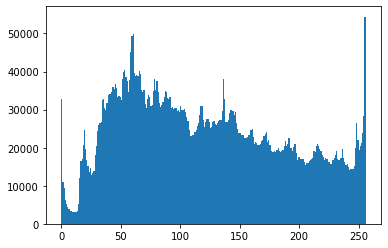

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('download.jpeg', 1)
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

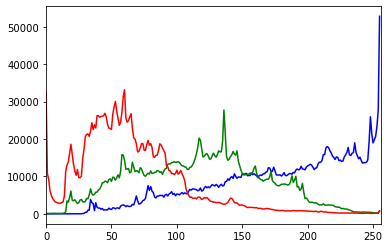

In [2]:
image = cv2.imread('download.jpeg')
color = ('b', 'g', 'r')

for i, col in enumerate(color):
    histr = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])
    
plt.show()

# Histogram Equalization

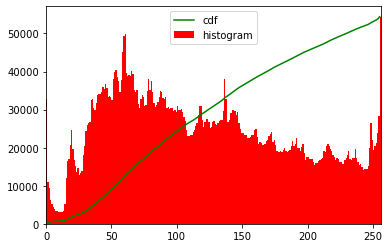

In [8]:
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
cdf = hist.cumsum()
# print(cdf)
# print(hist)
cdf_normalized = cdf * hist.max()/ cdf.max()
# print(cdf_normalized)
plt.plot(cdf_normalized, color = 'g')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'))
plt.show()

In [4]:
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255/(cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
plt.show()

In [5]:
blur_image = cv2.imread('dark.jpg', 0)
equ = cv2.equalizeHist(blur_image)
result = np.hstack((blur_image, equ))
cv2.imshow('blur', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
cl1 = clahe.apply(blur_image)
cv2.imshow('blur image', cl1)
cv2.waitKey(0)
cv2.destroyAllWindows()




# 2D Histograms

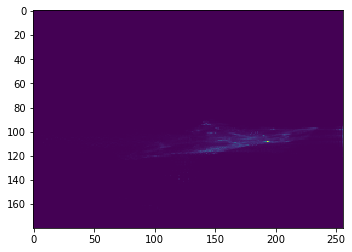

In [20]:
img = cv2.imread('download.jpeg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
plt.imshow(hist, interpolation='nearest')
plt.show()